# Supervised Learning 


Example Log Transformation 


In [1]:
# Import Libraries 
import seaborn as sns
import numpy as np
import pandas as pd 

In [4]:
# Load Data Set and make a copy 
tips = sns.load_dataset('tips')
tips1 = tips
tips1

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<AxesSubplot:xlabel='day', ylabel='total_bill'>

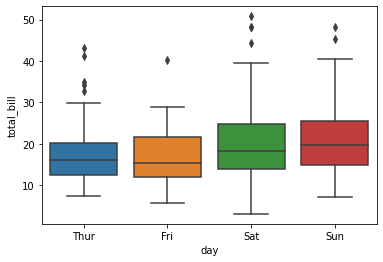

In [5]:
# Create Box plot to check outliers
sns.boxplot(data = tips1, x = 'day', y = 'total_bill')

C:\Users\nikhil reddy\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill', ylabel='Density'>

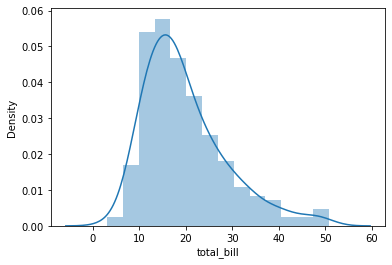

In [6]:
# Create dist plot 
sns.distplot(tips1['total_bill'])

In [7]:
# Apply log Transformation to address outliers 
tips1['total_bill'] = np.log10(tips1['total_bill'])

<AxesSubplot:xlabel='day', ylabel='total_bill'>

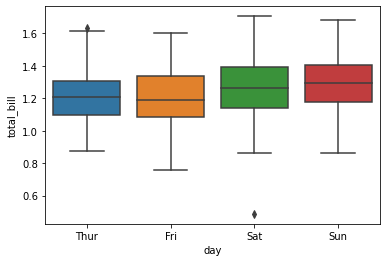

In [8]:
# Create box plot and check outlier again 
sns.boxplot(data = tips1, x = 'day', y = 'total_bill')

C:\Users\nikhil reddy\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill', ylabel='Density'>

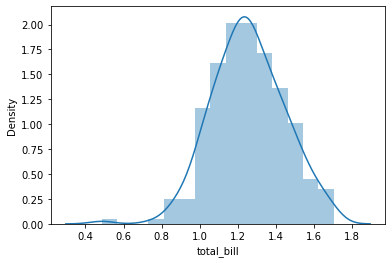

In [9]:
# Create dist plot 
sns.distplot(tips1['total_bill'])

In [10]:
# Save the result in .xls  
tips1.to_excel('C:\\Users\\nikhil reddy\\Downloads\\Day10\\Day10\\tips1.xlsx')

# Simple Linear regression 

In [11]:
# Import the Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
# Load the Data Set 
os.chdir('C:\\Users\\nikhil reddy\\Downloads\\Day10\\Day10\\')
os.getcwd()

'C:\\Users\\nikhil reddy\\Downloads\\Day10\\Day10'

In [14]:
df1= pd.read_csv('Salary_Data.csv')
df1

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


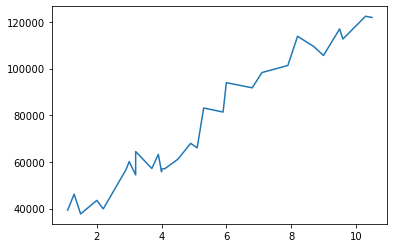

In [15]:
# create the graph to check the trend
plt.plot(df1["YearsExperience"], df1["Salary"])
plt.show()

In [16]:
# Split the data into x and y  - Independent and Dependent variable
x = df1.iloc[:,:-1].values
print (x)
y = df1.iloc[:,1].values
print (y)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


In [22]:
# Split the Data – Train Test split 
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [25]:
# Model fitting 
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [42]:
# Prediction
y_pred = reg.predict(x_test)
y_pred

array([ 48007.00743575,  93031.18863569, 115083.84881526,  41574.98155004,
        74653.97181939,  72816.25013776])

In [43]:
# y= mx +c (Coefficient and Interceptor Values) 
# Y= slope
from sklearn.metrics import r2_score
print ('Coefficient = ', reg.coef_)
print ('Intercept = ', reg.intercept_)

Coefficient =  [9188.60840815]
Intercept =  27792.068937816344


In [44]:
# Accuracy of the model 
r2_score(y_test,y_pred)

0.9577359365365308

In [45]:
# Final Result in Data Frame 
x_final = pd.DataFrame(x,columns = ['Experience'])
y_final = pd.DataFrame(y,columns= ['Salary'])
y_pred_final = pd.DataFrame(y_pred,columns= ['Salary Prediction'])
result = pd.concat([x_final,y_final,y_pred_final],1)
result
result.to_excel('Simple_Regression.xlsx')

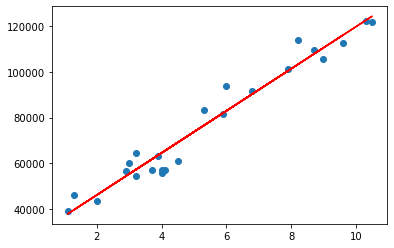

In [46]:
# Create a Graph with predicted numbers 
plt.scatter(x_train,y_train)
plt.plot (x_train,reg.predict(x_train),'red' )

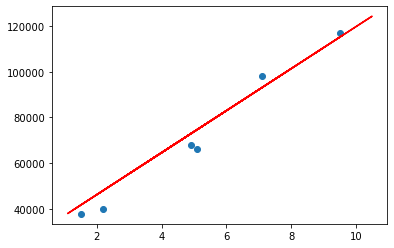

In [47]:
# predicted graph on test data 
plt.scatter(x_test,y_test)
plt.plot (x_train,reg.predict(x_train),'red' )

In [51]:
# Prediction for new set of data
new =np.array([10.9,8,9.5])
new= new.reshape(3,1)
y_pred= reg.predict(new)
print (y_pred)

[127947.90058667 101300.93620303 115083.84881526]
